# MODELING - BIKE SHARE SYSTEM ANALYSIS 

Load library packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, mean_squared_error,r2_score
import matplotlib.pylab as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from statsmodels.tsa import tsatools
from dmba import regressionSummary
from dmba import adjusted_r2_score

Load dataset

In [2]:
hour_df=pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Rename some column names of the dataset 

In [3]:
hour_df = hour_df.rename(columns={'weathersit':'weather_situation',
                       'yr':'year',
                       'mnth':'month',
                       'hr':'hour',
                       'hum':'humidity',
                       'cnt':'count'})

In [4]:
hour_df.head()

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,windspeed,casual,registered,count
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Drop unnecessary columns

In [5]:
hour_df = hour_df.drop(columns = ['instant' , 'dteday','year'])
hour_df

,season,month,hour,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,windspeed,casual,registered,count
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


Define weather situation variable names

In [6]:
def weather_situation(num):
    num = int(num)
    if num == 1:
        return 'Clear, Few clouds, Partly cloudy, Partly cloudy'
    elif num == 2:
        return 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'
    elif num == 3:
        return 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'
    else:
        return 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
    
    

In [7]:
hour_df['weather_situation'] = hour_df['weather_situation'].apply(weather_situation)
hour_df['weather_situation']


0          Clear, Few clouds, Partly cloudy, Partly cloudy
1          Clear, Few clouds, Partly cloudy, Partly cloudy
2          Clear, Few clouds, Partly cloudy, Partly cloudy
3          Clear, Few clouds, Partly cloudy, Partly cloudy
4          Clear, Few clouds, Partly cloudy, Partly cloudy
                               ...                        
17374    Mist + Cloudy, Mist + Broken clouds, Mist + Fe...
17375    Mist + Cloudy, Mist + Broken clouds, Mist + Fe...
17376      Clear, Few clouds, Partly cloudy, Partly cloudy
17377      Clear, Few clouds, Partly cloudy, Partly cloudy
17378      Clear, Few clouds, Partly cloudy, Partly cloudy
Name: weather_situation, Length: 17379, dtype: object

In [8]:
def season(num):
    num = int(num)
    if num == 1:
        return 'winter'
    elif num == 2:
        return 'spring'
    elif num == 3:
        return 'summer'
    else:
        return 'fall'

In [9]:
hour_df['season'] = hour_df['season'].apply(season)
hour_df['season']

0        winter
1        winter
2        winter
3        winter
4        winter
          ...  
17374    winter
17375    winter
17376    winter
17377    winter
17378    winter
Name: season, Length: 17379, dtype: object

Check correlation of some variables of the dataset

<AxesSubplot:>

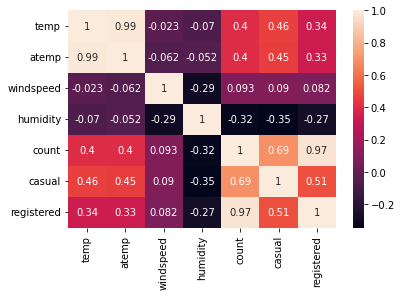

In [10]:
sns.heatmap(hour_df[["temp", "atemp", "windspeed", "humidity", "count","casual",'registered']].corr(), annot=True)

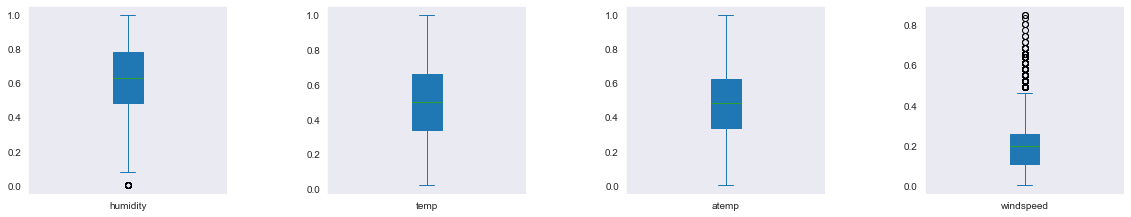

In [11]:
col_to_plot = ['humidity','temp','atemp','windspeed']
sns.set_style('dark')
hour_df[col_to_plot].plot(subplots=True, layout=(5,5), kind='box', figsize=(25,20), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

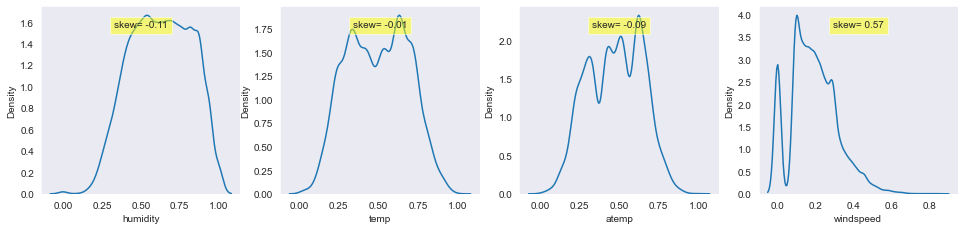

In [12]:
from scipy.stats import skew
def dist_plot(df, cols):
  sns.set_style('dark')
  plt.figure(figsize=(25,20))
  for i, col in enumerate(cols):
    ax = plt.subplot(5,6, i+1)
    sns.kdeplot(df[col], ax=ax)
    plt.text(0.5,0.9,"skew= " + str(round(skew(df[col]),2)), bbox=dict(facecolor='yellow', alpha=0.5), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    plt.xlabel(col)
plt.show()

dist_plot(hour_df,col_to_plot)

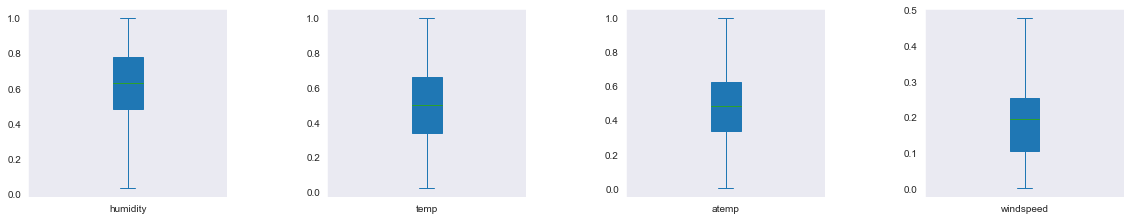

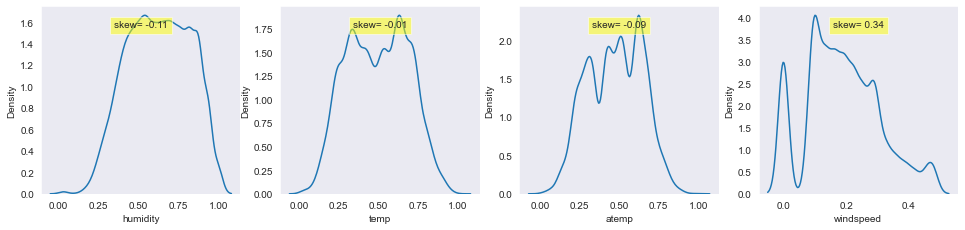

In [13]:
hour_cap = hour_df
features = ['humidity','temp','atemp','windspeed']
def iqr_capping(df, cols, factor):
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                 np.where(df[col]<lower_whisker, lower_whisker, df[col]))

iqr_capping(hour_cap, features, 1.5)

sns.set_style('dark')
hour_cap[col_to_plot].plot(subplots=True, layout=(5,5), kind='box', figsize=(25,20), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

dist_plot(hour_cap, col_to_plot)

In [14]:
excluded_columns = ['atemp','casual','registered']
hour_df_final = hour_df.drop(excluded_columns, axis=1)

I can see that 'temp' and 'atemp' have high correlation with each other so I decide to remove 'atemp' from the dataset

In [15]:
hour_df_final.head()

,season,month,hour,holiday,weekday,workingday,weather_situation,temp,humidity,windspeed,count
0,winter,1,0,0,6,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.81,0.0,16
1,winter,1,1,0,6,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.80,0.0,40
2,winter,1,2,0,6,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.80,0.0,32
3,winter,1,3,0,6,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.75,0.0,13
4,winter,1,4,0,6,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.75,0.0,1


skewness of 'count'

In [16]:
hour_df_final['count'].skew()

1.2774116037490577

Log transform 'count'

In [17]:
hour_df_final['count'] = np.log(hour_df_final['count'] + 1)

Get dummies

In [18]:
dummified_df = pd.get_dummies(hour_df_final, columns = ['season', 'workingday', 'weather_situation'], drop_first = True)
dummified_df

,month,hour,holiday,weekday,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,workingday_1,"weather_situation_Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog","weather_situation_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weather_situation_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
0,1,0,0,6,0.24,0.81,0.0000,2.833213,0,0,1,0,0,0,0
1,1,1,0,6,0.22,0.80,0.0000,3.713572,0,0,1,0,0,0,0
2,1,2,0,6,0.22,0.80,0.0000,3.496508,0,0,1,0,0,0,0
3,1,3,0,6,0.24,0.75,0.0000,2.639057,0,0,1,0,0,0,0
4,1,4,0,6,0.24,0.75,0.0000,0.693147,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,12,19,0,1,0.26,0.60,0.1642,4.787492,0,0,1,1,0,0,1
17375,12,20,0,1,0.26,0.60,0.1642,4.499810,0,0,1,1,0,0,1
17376,12,21,0,1,0.26,0.60,0.1642,4.510860,0,0,1,1,0,0,0
17377,12,22,0,1,0.26,0.56,0.1343,4.127134,0,0,1,1,0,0,0


# Linear Regression of 'count'

In [19]:
x= dummified_df.drop('count',axis=1)
y= dummified_df['count']

Train split based on the final dataset 

In [20]:
train_x,valid_x, train_y, valid_y = train_test_split(x, y, test_size=.3, random_state=10)

In [21]:
print(train_x.shape)
valid_x.shape

(12165, 14)


(5214, 14)

In [22]:
print(train_y.shape)
valid_y.shape

(12165,)


(5214,)

In [23]:
hour_lm_count=LinearRegression()
hour_lm_count.fit(train_x,train_y)

LinearRegression()

In [24]:
hour_lm_count.intercept_

3.4044240575297926

In [25]:
hour_lm_count.coef_

array([-3.47700401e-04,  9.41780660e-02, -2.26694778e-01,  1.28207831e-02,
        2.55719662e+00, -1.43643797e+00,  2.24901011e-01, -3.31612102e-01,
       -5.22008088e-01, -4.84260955e-01, -5.42574915e-02, -1.00504844e-01,
       -2.38857203e-01,  1.66178094e-01])

In [26]:
regressionSummary(train_y, hour_lm_count.predict(train_x))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 1.0202
            Mean Absolute Error (MAE) : 0.8040
          Mean Percentage Error (MPE) : -11.2648
Mean Absolute Percentage Error (MAPE) : 26.1391


In [27]:
pred_y = hour_lm_count.predict(train_x)
pred_y

array([5.11460218, 4.53619954, 5.54446346, ..., 4.04232231, 4.5333529 ,
       4.90441891])

In [28]:
result = pd.DataFrame({'predicted': pred_y,
                       'actual': train_y,
                       'residuals': train_y - pred_y})

In [29]:
result

,predicted,actual,residuals
16745,5.114602,5.451038,0.336436
517,4.536200,4.189655,-0.346545
11296,5.544463,5.662960,0.118497
4726,5.766532,5.736572,-0.029960
8585,4.093299,4.875197,0.781898
...,...,...,...
4829,3.878619,1.609438,-2.269181
10201,2.964532,0.693147,-2.271385
9372,4.042322,4.976734,0.934411
7291,4.533353,5.429346,0.895993


In [30]:
hour_lm_predict_count = hour_lm_count.predict(valid_x)
hour_lm_predict_count.shape

(5214,)

In [31]:
result = pd.DataFrame({'predicted': hour_lm_predict_count,
                       'actual' : valid_y,
                       'residual': valid_y - hour_lm_predict_count})

In [32]:
result.head(10)

,predicted,actual,residual
6557,5.883508,5.926926,0.043418
11737,3.977992,4.844187,0.866195
4952,4.424783,3.218876,-1.205907
2853,5.832524,5.902633,0.070109
3697,5.835815,4.510860,-1.324956
7305,3.039286,4.330733,1.291447
15922,3.703583,2.772589,-0.930994
17084,5.216713,5.472271,0.255558
15165,4.459590,4.532599,0.073010
8756,4.919674,5.288267,0.368593


In [33]:
regressionSummary(train_y, pred_y)


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 1.0202
            Mean Absolute Error (MAE) : 0.8040
          Mean Percentage Error (MPE) : -11.2648
Mean Absolute Percentage Error (MAPE) : 26.1391


In [34]:
regressionSummary(valid_y, hour_lm_predict_count)


Regression statistics

                      Mean Error (ME) : -0.0289
       Root Mean Squared Error (RMSE) : 1.0355
            Mean Absolute Error (MAE) : 0.8209
          Mean Percentage Error (MPE) : -12.6773
Mean Absolute Percentage Error (MAPE) : 27.3304


In [35]:
adjusted_r2_score(train_y, pred_y, hour_lm_count)

0.4736645466901005

In [36]:
adjusted_r2_score(valid_y, hour_lm_predict_count, hour_lm_count)

0.4829604734361509

In [37]:
r2_score(valid_y, hour_lm_count.predict(valid_x))

0.48434903153549747

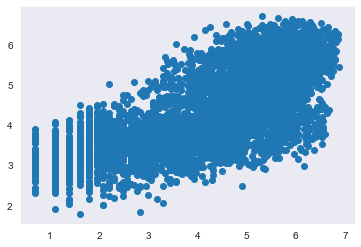

In [38]:
plt.scatter(valid_y, hour_lm_count.predict(valid_x))

In [39]:
feature_names_count = x.columns
model_coefficients = hour_lm_count.coef_

coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names_count, 
                              columns = ['Coefficient value of count'])
print(coefficients_df)

                                                    Coefficient value of count
month                                                                -0.000348
hour                                                                  0.094178
holiday                                                              -0.226695
weekday                                                               0.012821
temp                                                                  2.557197
humidity                                                             -1.436438
windspeed                                                             0.224901
season_spring                                                        -0.331612
season_summer                                                        -0.522008
season_winter                                                        -0.484261
workingday_1                                                         -0.054257
weather_situation_Heavy Rain + Ice Pallets + Th...  

In [40]:
coefficients_df.sort_values(by = 'Coefficient value of count', ascending = False, inplace = True)

<AxesSubplot:>

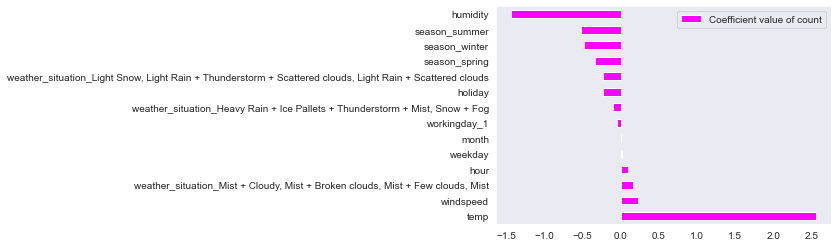

In [41]:
coefficients_df.plot(kind = 'barh', colormap='spring')

# Random Forest of 'count'

In [42]:
rf_count=RandomForestRegressor(random_state=1, n_estimators=500)
rf_count.fit(train_x, train_y)

RandomForestRegressor(n_estimators=500, random_state=1)

In [43]:
rf_count.feature_importances_

array([1.59426386e-02, 7.46909320e-01, 2.52037483e-03, 1.45786764e-02,
       9.10046512e-02, 2.69529602e-02, 1.68093801e-02, 1.42034255e-03,
       7.53224160e-04, 1.47094141e-02, 4.99483567e-02, 1.76606354e-06,
       1.58837340e-02, 2.56516134e-03])

In [44]:
importance = rf_count.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_count.estimators_], axis =0)

In [45]:
df = pd.DataFrame({'feature' : train_x.columns,
                   'importance': importance,
                   'std'        :std})
print(df.sort_values('importance', ascending = False))

                                              feature  importance       std
1                                                hour    0.746909  0.008374
4                                                temp    0.091005  0.004288
10                                       workingday_1    0.049948  0.006337
5                                            humidity    0.026953  0.003243
6                                           windspeed    0.016809  0.001015
0                                               month    0.015943  0.001964
12  weather_situation_Light Snow, Light Rain + Thu...    0.015884  0.002586
9                                       season_winter    0.014709  0.003679
3                                             weekday    0.014579  0.001833
13  weather_situation_Mist + Cloudy, Mist + Broken...    0.002565  0.000405
2                                             holiday    0.002520  0.000540
7                                       season_spring    0.001420  0.000512
8           

Text(0.5, 1.0, 'Visualizing Important Features')

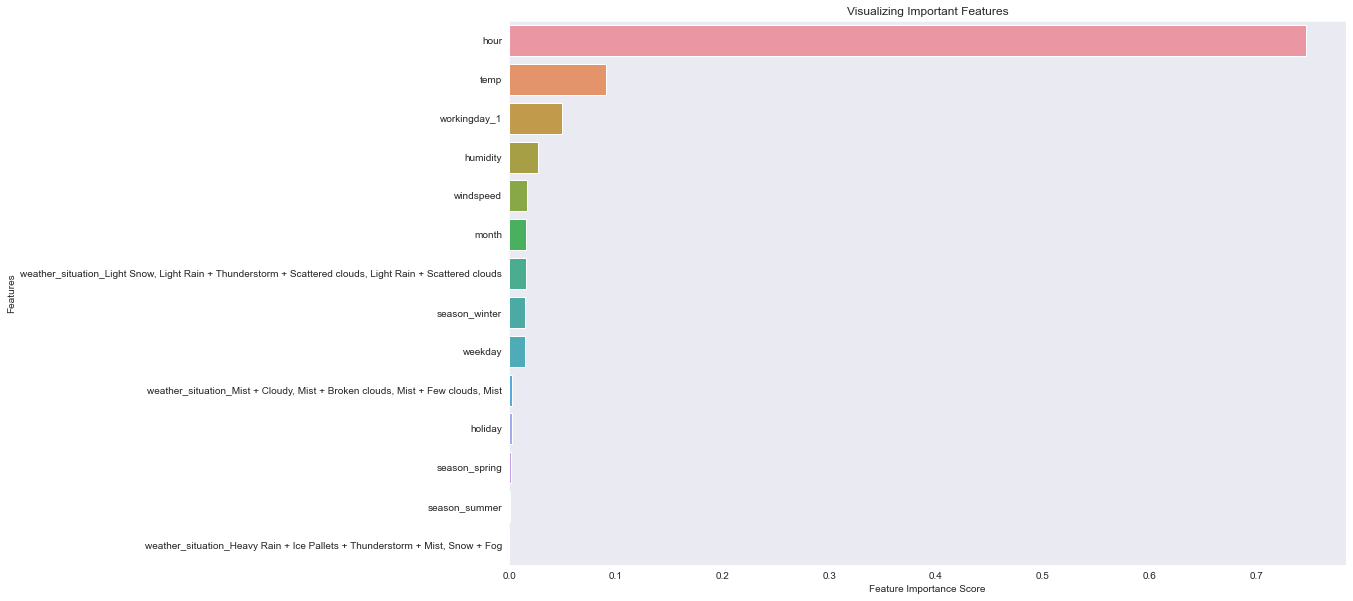

In [46]:
feature_imp = pd.Series(rf_count.feature_importances_, index= train_x.columns).sort_values(ascending=False)
plt.figure(figsize = (15, 10))
sns.barplot(x=feature_imp[:20], y=feature_imp[:20].index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

In [47]:
rf_count.predict(valid_x)

array([6.19360398, 4.99333537, 3.4890254 , ..., 5.48839218, 5.22052433,
       5.25398003])

In [48]:
regressionSummary(train_y, rf_count.predict(train_x))


Regression statistics

                      Mean Error (ME) : -0.0013
       Root Mean Squared Error (RMSE) : 0.1409
            Mean Absolute Error (MAE) : 0.1051
          Mean Percentage Error (MPE) : -0.7312
Mean Absolute Percentage Error (MAPE) : 3.1810


In [49]:
regressionSummary(valid_y, rf_count.predict(valid_x))


Regression statistics

                      Mean Error (ME) : -0.0042
       Root Mean Squared Error (RMSE) : 0.3979
            Mean Absolute Error (MAE) : 0.2955
          Mean Percentage Error (MPE) : -2.2889
Mean Absolute Percentage Error (MAPE) : 9.3627


In [50]:
print(np.sqrt(mean_squared_error(train_y, rf_count.predict(train_x))))
print(np.sqrt(mean_squared_error(valid_y, rf_count.predict(valid_x))))

0.14085278514416058
0.39790920397768065


In [51]:
r2_score(valid_y, rf_count.predict(valid_x))

0.923854671139885

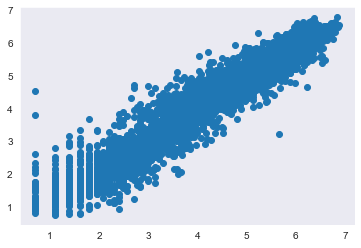

In [52]:
plt.scatter(valid_y, rf_count.predict(valid_x))

# Polynomial Regression of 'count'

In [53]:
x= dummified_df.drop('count',axis=1)
y= dummified_df['count']
poly = PolynomialFeatures(degree=2, include_bias=True)
poly_features = poly.fit_transform(x)

In [54]:
train_x,valid_x, train_y, valid_y = train_test_split(poly_features, y, test_size=.3, random_state=10)

In [55]:
hour_lm_count.fit(train_x, train_y)

LinearRegression()

In [56]:
y_predicted_count = hour_lm_count.predict(valid_x)

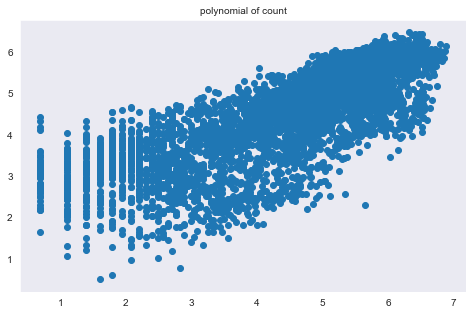

In [57]:
plt.figure(figsize=(8, 5))
plt.title("polynomial of count", size=10)
plt.scatter(valid_y, y_predicted_count)
plt.show()

In [58]:
regressionSummary(train_y,hour_lm_count.predict(train_x) )


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.8649
            Mean Absolute Error (MAE) : 0.6481
          Mean Percentage Error (MPE) : -8.9197
Mean Absolute Percentage Error (MAPE) : 22.0318


In [59]:
regressionSummary(valid_y, y_predicted_count)


Regression statistics

                      Mean Error (ME) : -0.0235
       Root Mean Squared Error (RMSE) : 0.8959
            Mean Absolute Error (MAE) : 0.6737
          Mean Percentage Error (MPE) : -10.4421
Mean Absolute Percentage Error (MAPE) : 23.6164


In [60]:
r2_score(valid_y, y_predicted_count)

0.6140222779705209

# Linear Regression for "casual"

In [61]:
hour_df['casual'].skew()

2.499236891330847

In [62]:
hour_df['casual'] = np.log(hour_df['casual'] + 1)

In [63]:
x= dummified_df.drop('count',axis=1)
y= hour_df['casual']

In [64]:
train_x,valid_x, train_y, valid_y = train_test_split(x, y, test_size=.3, random_state=10)

In [65]:
hour_lm_casual=LinearRegression()
hour_lm_casual.fit(train_x,train_y)

LinearRegression()

In [66]:
regressionSummary(train_y, hour_lm_casual.predict(train_x))


Regression statistics

               Mean Error (ME) : 0.0000
Root Mean Squared Error (RMSE) : 0.9283
     Mean Absolute Error (MAE) : 0.7471


In [67]:
hour_lm_casual.intercept_

1.5865199579646023

In [68]:
hour_lm_casual.coef_

array([ 0.0092328 ,  0.07363979, -0.2442284 ,  0.00809924,  4.25123554,
       -1.94359737,  0.06956664, -0.09017157, -0.55335139, -0.36768683,
       -0.69866403, -0.18936098, -0.25817114,  0.1667712 ])

In [69]:
pred_y = hour_lm_casual.predict(train_x)
pred_y

array([3.00002246, 2.60401057, 3.48993578, ..., 1.71481024, 2.82101187,
       3.26816646])

In [70]:
result = pd.DataFrame({'predicted': pred_y,
                       'actual': train_y,
                       'residuals': train_y - pred_y})

In [71]:
result

,predicted,actual,residuals
16745,3.000022,3.218876,0.218853
517,2.604011,2.302585,-0.301425
11296,3.489936,3.583519,0.093583
4726,3.855094,3.828641,-0.026453
8585,1.737985,2.564949,0.826965
...,...,...,...
4829,2.238625,1.098612,-1.140013
10201,0.578702,0.000000,-0.578702
9372,1.714810,3.555348,1.840538
7291,2.821012,4.043051,1.222039


In [72]:
hour_lm_predict_casual = hour_lm_casual.predict(valid_x)
hour_lm_predict_casual.shape

(5214,)

In [73]:
result = pd.DataFrame({'predicted': hour_lm_predict_casual,
                       'actual' : valid_y,
                       'residual': valid_y - hour_lm_predict_casual})

In [74]:
result.head(10)

,predicted,actual,residual
6557,3.790282,3.713572,-0.076710
11737,2.154352,1.791759,-0.362592
4952,3.309369,1.945910,-1.363459
2853,4.067111,3.761200,-0.305911
3697,3.925663,2.944439,-0.981224
7305,1.420729,2.397895,0.977167
15922,1.511902,1.791759,0.279858
17084,2.960993,3.367296,0.406302
15165,3.255090,2.564949,-0.690141
8756,2.629386,2.995732,0.366346


In [75]:
regressionSummary(train_y, pred_y)


Regression statistics

               Mean Error (ME) : 0.0000
Root Mean Squared Error (RMSE) : 0.9283
     Mean Absolute Error (MAE) : 0.7471


In [76]:
regressionSummary(valid_y, hour_lm_predict_casual)


Regression statistics

               Mean Error (ME) : -0.0146
Root Mean Squared Error (RMSE) : 0.9461
     Mean Absolute Error (MAE) : 0.7610


In [77]:
adjusted_r2_score(train_y, pred_y, hour_lm_casual)

0.6081707286098625

In [78]:
adjusted_r2_score(valid_y, hour_lm_predict_casual, hour_lm_casual)

0.6032221768630344

In [79]:
r2_score(valid_y, hour_lm_casual.predict(valid_x))

0.6042877608883399

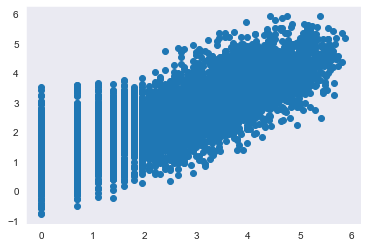

In [80]:
plt.scatter(result['actual'], result['predicted'])

In [81]:
feature_names_casual = x.columns
model_coefficients_1 = hour_lm_casual.coef_

coefficients_df_1 = pd.DataFrame(data = model_coefficients_1, 
                              index = feature_names_casual, 
                              columns = ['Coefficient value of casual'])
print(coefficients_df_1)

                                                    Coefficient value of casual
month                                                                  0.009233
hour                                                                   0.073640
holiday                                                               -0.244228
weekday                                                                0.008099
temp                                                                   4.251236
humidity                                                              -1.943597
windspeed                                                              0.069567
season_spring                                                         -0.090172
season_summer                                                         -0.553351
season_winter                                                         -0.367687
workingday_1                                                          -0.698664
weather_situation_Heavy Rain + Ice Palle

In [82]:
coefficients_df_1.sort_values(by = 'Coefficient value of casual', ascending = False, inplace = True)

<AxesSubplot:>

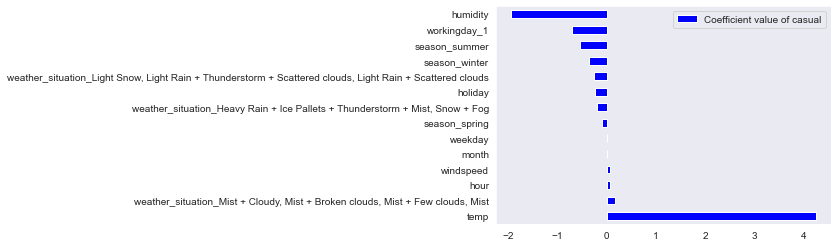

In [83]:
coefficients_df_1.plot(kind = 'barh', colormap='winter')

# Random Forest of 'casual'

In [84]:
excluded_columns_casual = ['atemp','count','registered']
hour_df_final_1 = hour_df.drop(excluded_columns_casual, axis=1)

In [85]:
dummified_df_1 = pd.get_dummies(hour_df_final_1, columns = ['season', 'workingday', 'weather_situation'], drop_first = True)
dummified_df_1

,month,hour,holiday,weekday,temp,humidity,windspeed,casual,season_spring,season_summer,season_winter,workingday_1,"weather_situation_Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog","weather_situation_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weather_situation_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
0,1,0,0,6,0.24,0.81,0.0000,1.386294,0,0,1,0,0,0,0
1,1,1,0,6,0.22,0.80,0.0000,2.197225,0,0,1,0,0,0,0
2,1,2,0,6,0.22,0.80,0.0000,1.791759,0,0,1,0,0,0,0
3,1,3,0,6,0.24,0.75,0.0000,1.386294,0,0,1,0,0,0,0
4,1,4,0,6,0.24,0.75,0.0000,0.000000,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,12,19,0,1,0.26,0.60,0.1642,2.484907,0,0,1,1,0,0,1
17375,12,20,0,1,0.26,0.60,0.1642,2.197225,0,0,1,1,0,0,1
17376,12,21,0,1,0.26,0.60,0.1642,2.079442,0,0,1,1,0,0,0
17377,12,22,0,1,0.26,0.56,0.1343,2.639057,0,0,1,1,0,0,0


In [86]:
x= dummified_df_1.drop('casual',axis=1)
y= hour_df_final_1['casual']

In [87]:
rf_casual=RandomForestRegressor(random_state=1, n_estimators=500)
rf_casual.fit(train_x, train_y)

RandomForestRegressor(n_estimators=500, random_state=1)

In [88]:
rf_casual.feature_importances_

array([2.27677627e-02, 5.52798602e-01, 1.35871736e-03, 1.93202272e-02,
       2.36139294e-01, 5.88211859e-02, 2.66186838e-02, 2.45423393e-03,
       1.62585931e-03, 7.45220346e-03, 5.16453951e-02, 6.12900565e-06,
       1.48942741e-02, 4.09743279e-03])

In [89]:
importance = rf_casual.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_casual.estimators_], axis =0)

In [90]:
df = pd.DataFrame({'feature' : train_x.columns,
                   'importance': importance,
                   'std'        :std})
print(df.sort_values('importance', ascending = False))

                                              feature  importance       std
1                                                hour    0.552799  0.007382
4                                                temp    0.236139  0.005729
5                                            humidity    0.058821  0.006179
10                                       workingday_1    0.051645  0.002828
6                                           windspeed    0.026619  0.001539
0                                               month    0.022768  0.001794
3                                             weekday    0.019320  0.001309
12  weather_situation_Light Snow, Light Rain + Thu...    0.014894  0.002461
9                                       season_winter    0.007452  0.001467
13  weather_situation_Mist + Cloudy, Mist + Broken...    0.004097  0.000502
7                                       season_spring    0.002454  0.000512
8                                       season_summer    0.001626  0.000366
2           

Text(0.5, 1.0, 'Visualizing Important Features')

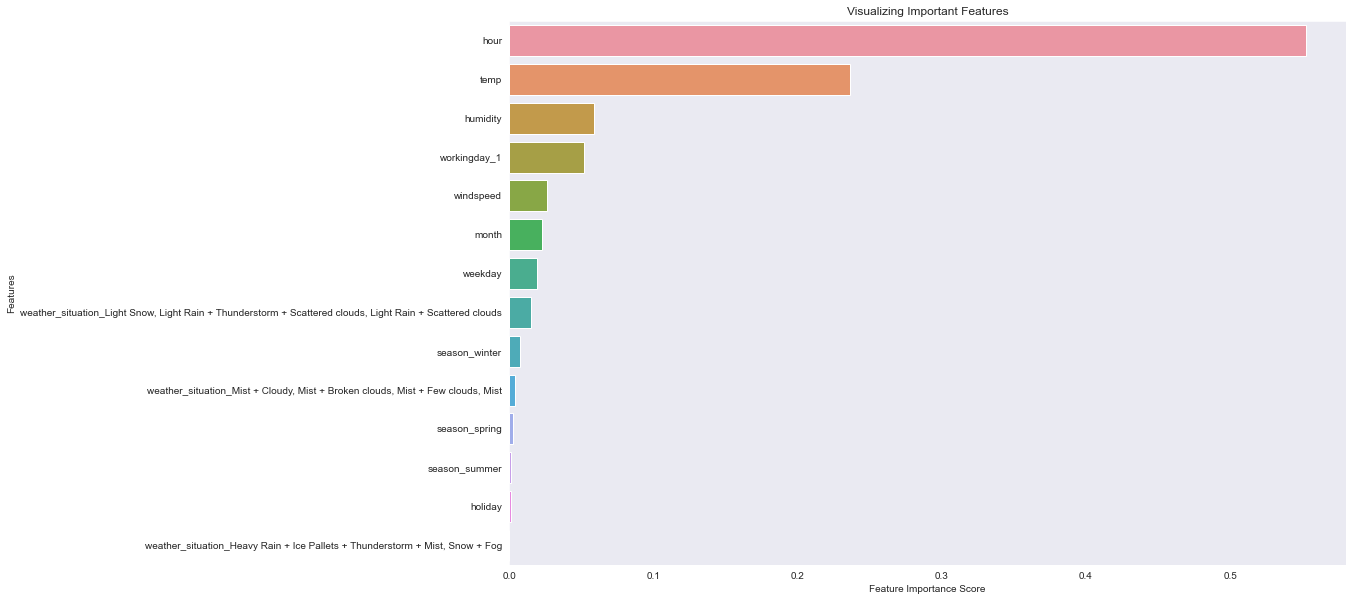

In [91]:
feature_imp = pd.Series(rf_casual.feature_importances_, index= train_x.columns).sort_values(ascending=False)
plt.figure(figsize = (15, 10))
sns.barplot(x=feature_imp[:20], y=feature_imp[:20].index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

In [92]:
rf_casual.predict(valid_x)

array([4.14721322, 1.93824412, 2.16098468, ..., 3.95798943, 4.07651008,
       4.09951736])

In [93]:
regressionSummary(train_y, rf_casual.predict(train_x))


Regression statistics

               Mean Error (ME) : -0.0017
Root Mean Squared Error (RMSE) : 0.1887
     Mean Absolute Error (MAE) : 0.1419


In [94]:
regressionSummary(valid_y, rf_casual.predict(valid_x))


Regression statistics

               Mean Error (ME) : 0.0034
Root Mean Squared Error (RMSE) : 0.5221
     Mean Absolute Error (MAE) : 0.3920


In [95]:
print(np.sqrt(mean_squared_error(train_y, rf_casual.predict(train_x))))
print(np.sqrt(mean_squared_error(valid_y, rf_casual.predict(valid_x))))

0.1886833918467521
0.5220719102156863


In [96]:
r2_score(valid_y, rf_casual.predict(valid_x))

0.8795071030518629

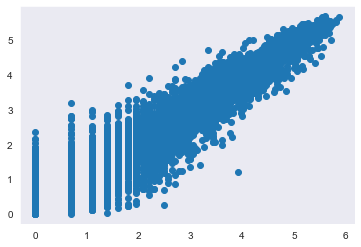

In [97]:
plt.scatter(valid_y, rf_casual.predict(valid_x))

# Polynomial Regression of 'casual'

In [98]:
x= dummified_df.drop('count',axis=1)
y= hour_df['casual']

In [99]:
poly_casual = PolynomialFeatures(degree=2, include_bias=True)
poly_features_casual = poly_casual.fit_transform(x)

In [100]:
train_x,valid_x, train_y, valid_y = train_test_split(poly_features_casual, y, test_size=.3, random_state=10)

In [101]:
hour_lm_casual.fit(train_x, train_y)

LinearRegression()

In [103]:
y_predicted_casual = hour_lm_casual.predict(valid_x)
y_predicted_casual

array([3.74220877, 2.14460878, 3.30913615, ..., 4.1907431 , 4.11114574,
       3.98025054])

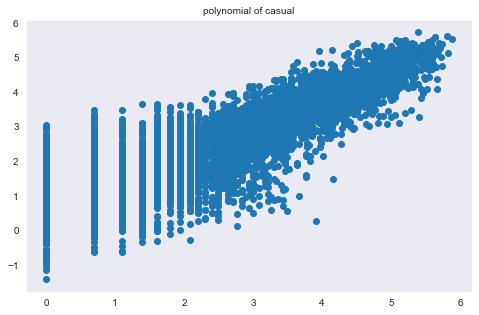

In [104]:
plt.figure(figsize=(8, 5))
plt.title("polynomial of casual", size=10)
plt.scatter(valid_y, y_predicted_casual)
plt.show()

In [105]:
regressionSummary(train_y,hour_lm_casual.predict(train_x) )


Regression statistics

               Mean Error (ME) : 0.0000
Root Mean Squared Error (RMSE) : 0.7806
     Mean Absolute Error (MAE) : 0.6001


In [106]:
regressionSummary(valid_y, y_predicted_casual)


Regression statistics

               Mean Error (ME) : -0.0108
Root Mean Squared Error (RMSE) : 0.8045
     Mean Absolute Error (MAE) : 0.6160


In [107]:
r2_score(valid_y, y_predicted_casual)

0.7139070218812884

# Linear regression for "registered"

In [108]:
hour_df['registered'].skew()

1.5579042256481028

In [109]:
hour_df['registered'] = np.log(hour_df['registered'] + 1)

In [110]:
x= dummified_df.drop('count',axis=1)
y= hour_df['registered']

In [111]:
train_x,valid_x, train_y, valid_y = train_test_split(x, y, test_size=.3, random_state=10)

In [112]:
hour_lm_registered=LinearRegression()
hour_lm_registered.fit(train_x,train_y)

LinearRegression()

In [113]:
hour_lm_registered.intercept_

3.2159915810226245

In [114]:
hour_lm_registered.coef_

array([-1.66840668e-03,  9.52056494e-02, -2.24707729e-01,  1.45319980e-02,
        2.16680331e+00, -1.30980959e+00,  2.49282139e-01, -3.73475977e-01,
       -5.01377239e-01, -4.93677450e-01,  9.40064047e-02, -1.38457643e-01,
       -2.29233414e-01,  1.63758716e-01])

In [115]:
regressionSummary(train_y, hour_lm_registered.predict(train_x))


Regression statistics

               Mean Error (ME) : 0.0000
Root Mean Squared Error (RMSE) : 1.0327
     Mean Absolute Error (MAE) : 0.8102


In [116]:
pred_y = hour_lm_registered.predict(train_x)
pred_y

array([4.96310883, 4.33193841, 5.35804494, ..., 3.95467767, 4.29930845,
       4.6457678 ])

In [117]:
result = pd.DataFrame({'predicted': pred_y,
                       'actual': train_y,
                       'residuals': train_y - pred_y})

In [118]:
result

,predicted,actual,residuals
16745,4.963109,5.342334,0.379225
517,4.331938,4.043051,-0.288887
11296,5.358045,5.533389,0.175345
4726,5.551551,5.579730,0.028179
8585,4.016580,4.779123,0.762544
...,...,...,...
4829,3.665776,1.098612,-2.567163
10201,2.918714,0.693147,-2.225567
9372,3.954678,4.709530,0.754853
7291,4.299308,5.147494,0.848186


In [119]:
hour_lm_predict_registered = hour_lm_registered.predict(valid_x)
hour_lm_predict_registered.shape

(5214,)

In [120]:
result = pd.DataFrame({'predicted': hour_lm_predict_registered,
                       'actual' : valid_y,
                       'residual': valid_y - hour_lm_predict_registered})

In [121]:
result.head(10)

,predicted,actual,residual
6557,5.702548,5.814131,0.111582
11737,3.793596,4.804021,1.010425
4952,4.079004,2.944439,-1.134565
2853,5.582279,5.780744,0.198465
3697,5.610032,4.290459,-1.319573
7305,2.821987,4.189655,1.367668
15922,3.606598,2.397895,-1.208703
17084,5.087507,5.347108,0.259601
15165,4.134733,4.394449,0.259717
8756,4.801481,5.187386,0.385905


In [122]:
regressionSummary(train_y, pred_y)


Regression statistics

               Mean Error (ME) : 0.0000
Root Mean Squared Error (RMSE) : 1.0327
     Mean Absolute Error (MAE) : 0.8102


In [123]:
regressionSummary(valid_y, hour_lm_predict_registered)


Regression statistics

               Mean Error (ME) : -0.0306
Root Mean Squared Error (RMSE) : 1.0452
     Mean Absolute Error (MAE) : 0.8255


In [124]:
adjusted_r2_score(train_y, pred_y, hour_lm_registered)

0.44546729964245524

In [125]:
adjusted_r2_score(valid_y, hour_lm_predict_registered, hour_lm_registered)

0.4583613060643249

In [126]:
r2_score(valid_y, hour_lm_registered.predict(valid_x))

0.4598159275327882

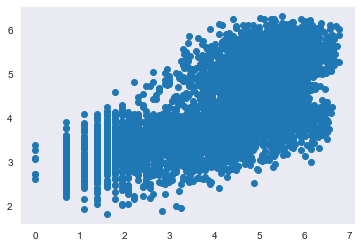

In [127]:
plt.scatter(result['actual'], result['predicted'])

In [128]:
feature_names_registered = x.columns
model_coefficients_2 = hour_lm_registered.coef_

coefficients_df_2 = pd.DataFrame(data = model_coefficients_2, 
                              index = feature_names_registered, 
                              columns = ['Coefficient value of registered'])
print(coefficients_df_2)

                                                    Coefficient value of registered
month                                                                     -0.001668
hour                                                                       0.095206
holiday                                                                   -0.224708
weekday                                                                    0.014532
temp                                                                       2.166803
humidity                                                                  -1.309810
windspeed                                                                  0.249282
season_spring                                                             -0.373476
season_summer                                                             -0.501377
season_winter                                                             -0.493677
workingday_1                                                               0

In [129]:
coefficients_df_2.sort_values(by = 'Coefficient value of registered', ascending = False, inplace = True)

<AxesSubplot:>

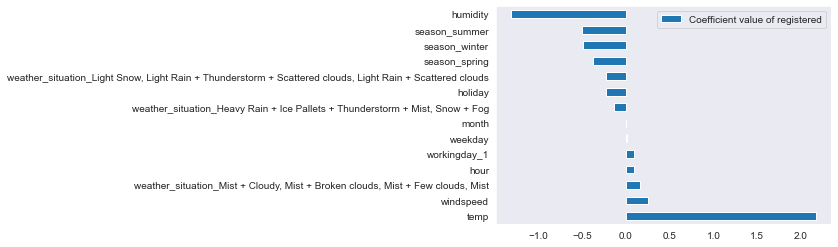

In [130]:
coefficients_df_2.plot(kind = 'barh')

# Random Forest of 'Registered'

In [131]:
excluded_columns_3 = ['atemp','count','casual']
hour_df_final_3 = hour_df.drop(excluded_columns_3, axis=1)

In [132]:
dummified_df_3 = pd.get_dummies(hour_df_final_3, columns = ['season', 'workingday', 'weather_situation'], drop_first = True)
dummified_df_3

,month,hour,holiday,weekday,temp,humidity,windspeed,registered,season_spring,season_summer,season_winter,workingday_1,"weather_situation_Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog","weather_situation_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weather_situation_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
0,1,0,0,6,0.24,0.81,0.0000,2.639057,0,0,1,0,0,0,0
1,1,1,0,6,0.22,0.80,0.0000,3.496508,0,0,1,0,0,0,0
2,1,2,0,6,0.22,0.80,0.0000,3.332205,0,0,1,0,0,0,0
3,1,3,0,6,0.24,0.75,0.0000,2.397895,0,0,1,0,0,0,0
4,1,4,0,6,0.24,0.75,0.0000,0.693147,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,12,19,0,1,0.26,0.60,0.1642,4.691348,0,0,1,1,0,0,1
17375,12,20,0,1,0.26,0.60,0.1642,4.406719,0,0,1,1,0,0,1
17376,12,21,0,1,0.26,0.60,0.1642,4.430817,0,0,1,1,0,0,0
17377,12,22,0,1,0.26,0.56,0.1343,3.891820,0,0,1,1,0,0,0


In [133]:
x= dummified_df_3.drop('registered',axis=1)
y= hour_df_final_3['registered']

In [134]:
rf_registered=RandomForestRegressor(random_state=1, n_estimators=500)
rf_registered.fit(train_x, train_y)

RandomForestRegressor(n_estimators=500, random_state=1)

In [135]:
rf_registered.feature_importances_

array([1.95818314e-02, 7.32272347e-01, 3.01403930e-03, 1.40335154e-02,
       7.44271544e-02, 2.82663398e-02, 1.74359064e-02, 1.51629849e-03,
       7.75515556e-04, 1.19055618e-02, 8.03733152e-02, 3.32522512e-06,
       1.36318268e-02, 2.76302353e-03])

In [136]:
importance = rf_registered.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_registered.estimators_], axis =0)

In [137]:
df = pd.DataFrame({'feature' : train_x.columns,
                   'importance': importance,
                   'std'        :std})
print(df.sort_values('importance', ascending = False))

                                              feature  importance       std
1                                                hour    0.732272  0.007889
10                                       workingday_1    0.080373  0.007388
4                                                temp    0.074427  0.005103
5                                            humidity    0.028266  0.004363
0                                               month    0.019582  0.002284
6                                           windspeed    0.017436  0.001057
3                                             weekday    0.014034  0.001168
12  weather_situation_Light Snow, Light Rain + Thu...    0.013632  0.002207
9                                       season_winter    0.011906  0.003450
2                                             holiday    0.003014  0.000578
13  weather_situation_Mist + Cloudy, Mist + Broken...    0.002763  0.000370
7                                       season_spring    0.001516  0.000448
8           

Text(0.5, 1.0, 'Visualizing Important Features')

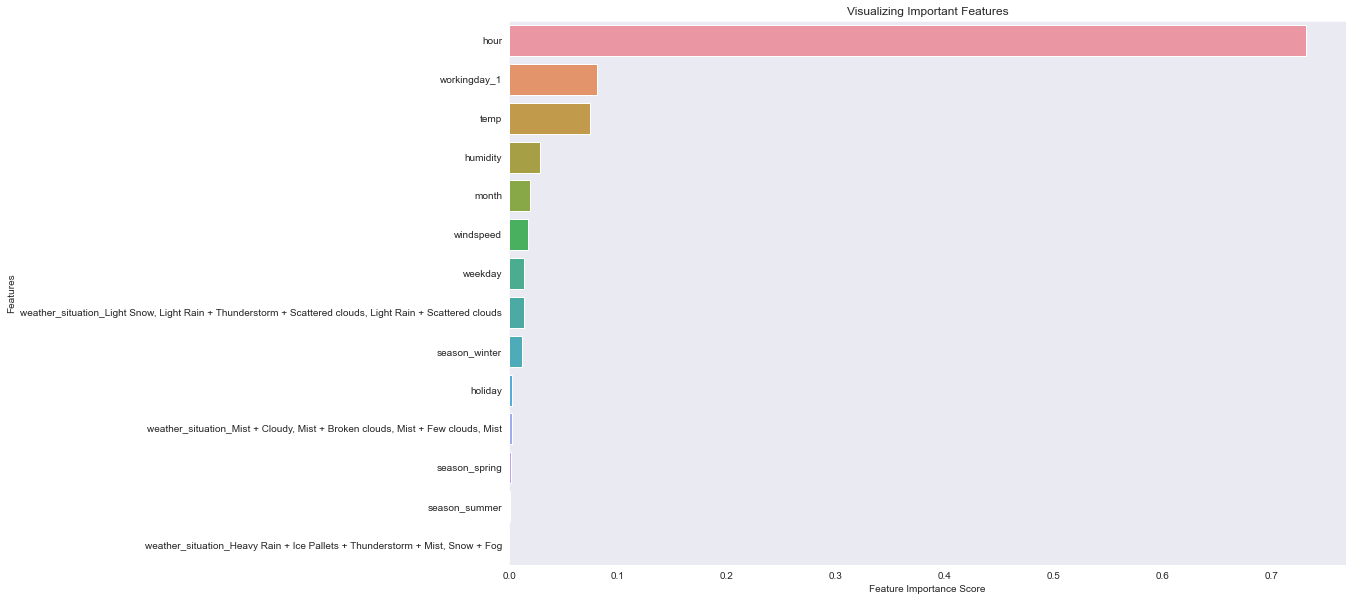

In [138]:
feature_imp = pd.Series(rf_registered.feature_importances_, index= train_x.columns).sort_values(ascending=False)
plt.figure(figsize = (15, 10))
sns.barplot(x=feature_imp[:20], y=feature_imp[:20].index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

In [139]:
rf_registered.predict(valid_x)

array([6.08565191, 4.95085069, 3.22630101, ..., 5.19563225, 4.8960243 ,
       4.95143367])

In [140]:
regressionSummary(train_y, rf_registered.predict(train_x))


Regression statistics

               Mean Error (ME) : -0.0009
Root Mean Squared Error (RMSE) : 0.1433
     Mean Absolute Error (MAE) : 0.1077


In [141]:
regressionSummary(valid_y, rf_registered.predict(valid_x))


Regression statistics

               Mean Error (ME) : -0.0047
Root Mean Squared Error (RMSE) : 0.3996
     Mean Absolute Error (MAE) : 0.3005


In [142]:
print(np.sqrt(mean_squared_error(train_y, rf_registered.predict(train_x))))
print(np.sqrt(mean_squared_error(valid_y, rf_registered.predict(valid_x))))

0.14330557868023203
0.3995593736634383


In [143]:
r2_score(valid_y, rf_registered.predict(valid_x))

0.9210526471974302

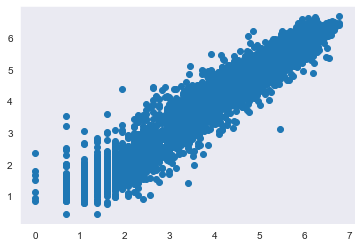

In [144]:
plt.scatter(valid_y, rf_registered.predict(valid_x))

# Polynomial Regression of 'registered'

In [145]:
x= dummified_df.drop('count',axis=1)
y= hour_df['registered']

In [146]:
poly_registered = PolynomialFeatures(degree=2, include_bias=True)
poly_features_registered = poly_registered.fit_transform(x)

In [147]:
train_x,valid_x, train_y, valid_y = train_test_split(poly_features_registered, y, test_size=.3, random_state=10)

In [148]:
hour_lm_registered.fit(train_x, train_y)

LinearRegression()

In [149]:
y_predicted_registered = hour_lm_registered.predict(valid_x)

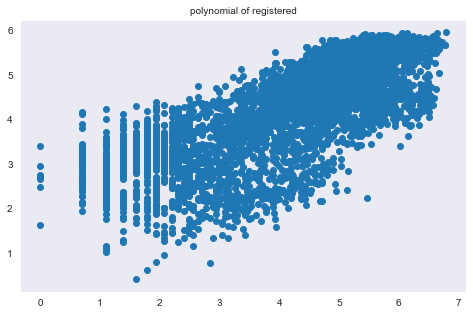

In [150]:
plt.figure(figsize=(8, 5))
plt.title("polynomial of registered", size=10)
plt.scatter(valid_y, y_predicted_registered)
plt.show()

In [151]:
regressionSummary(train_y,hour_lm_registered.predict(train_x) )


Regression statistics

               Mean Error (ME) : -0.0000
Root Mean Squared Error (RMSE) : 0.8845
     Mean Absolute Error (MAE) : 0.6681


In [152]:
regressionSummary(valid_y, y_predicted_registered)


Regression statistics

               Mean Error (ME) : -0.0252
Root Mean Squared Error (RMSE) : 0.9134
     Mean Absolute Error (MAE) : 0.6937


In [153]:
r2_score(valid_y, y_predicted_registered)

0.5874081747170266